In [303]:
%matplotlib inline
import cd_diagrams as cdd
import imp
import pandas as pd
import numpy as np
import amir_tools as at
import seaborn as sns
import glob
imp.reload(at)


<module 'amir_tools' from '/home/amirsalimi/ecg_augmentation/amir_tools.py'>

In [304]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()


Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


In [309]:
DATASET_ID = "CPSC2018"
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/inception_CPSC2018_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "inception_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

,classifier_name,1st degree av block,atrial fibrillation,premature atrial contraction,right bundle branch block,sinus rhythm,st depression,ventricular ectopics,micro avg,macro avg,weighted avg,samples avg
0,inception_0.05,0.826087,0.927660,0.642202,0.896000,0.753769,0.761905,0.685315,0.814923,0.784705,0.812042,0.744299
1,inception_0.05,0.813793,0.913043,0.707965,0.907104,0.725275,0.750000,0.718954,0.815351,0.790876,0.816384,0.759340
2,inception_0.05,0.851064,0.915254,0.646465,0.929648,0.714286,0.752577,0.777778,0.831187,0.798153,0.827883,0.770015
3,inception_0.05,0.830986,0.948276,0.727273,0.928760,0.783069,0.823529,0.768293,0.854257,0.830026,0.853936,0.789423
4,inception_0.05,0.808511,0.932735,0.660194,0.930233,0.717391,0.775281,0.779221,0.832117,0.800509,0.831205,0.762737
...,...,...,...,...,...,...,...,...,...,...,...,...
15,inception_1.0,0.828125,0.903766,0.350515,0.913386,0.674033,0.545455,0.645570,0.758101,0.694407,0.746968,0.672149
16,inception_1.0,0.832117,0.853846,0.176471,0.920716,0.692308,0.619048,0.542636,0.752036,0.662449,0.724583,0.682678
17,inception_1.0,0.800000,0.867925,0.238095,0.926702,0.729167,0.719101,0.666667,0.776187,0.706808,0.763085,0.682678
18,inception_1.0,0.842105,0.953586,0.455446,0.927461,0.760234,0.777143,0.740741,0.826374,0.779531,0.820416,0.747695


['inception_0.05' 'inception_0.1' 'inception_0.25' 'inception_0.5'
 'inception_0.75' 'inception_1.0']
inception_0.05     6.0
inception_0.1     13.0
inception_0.25     1.0
inception_0.5      0.0
inception_0.75     0.0
inception_1.0      0.0
dtype: float64
inception_1.0     5.05
inception_0.75    4.55
inception_0.5     3.95
inception_0.25    3.45
inception_0.05    2.35
inception_0.1     1.65
dtype: float64
('inception_0.05', 'inception_1.0', 3.814697265625e-06, True)
('inception_0.1', 'inception_0.75', 3.814697265625e-06, True)
('inception_0.1', 'inception_1.0', 5.7220458984375e-06, True)
('inception_0.1', 'inception_0.5', 9.5367431640625e-06, True)
('inception_0.1', 'inception_0.25', 0.0003948211669921875, True)
('inception_0.05', 'inception_0.75', 0.000850677490234375, True)
('inception_0.05', 'inception_0.5', 0.00830841064453125, False)
('inception_0.05', 'inception_0.1', 0.012079238891601562, False)
('inception_0.25', 'inception_1.0', 0.013616561889648438, False)
('inception_0.25', '

<module 'matplotlib.pyplot' from '/home/amirsalimi/miniconda3/envs/ecg_augment/lib/python3.10/site-packages/matplotlib/pyplot.py'>

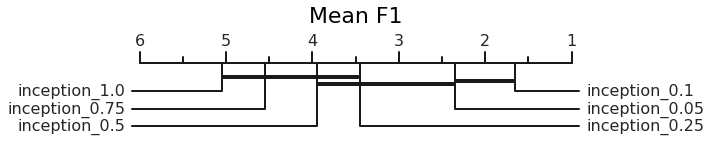

In [310]:
df_median = exp_df.reset_index()[["classifier_name","index",]]
df_median["value"] = list(exp_df[exp_df.columns[0:-4]].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
cdd.draw_cd_diagram(df_perf=df_median, title='Mean F1', labels=False,alpha=0.05)

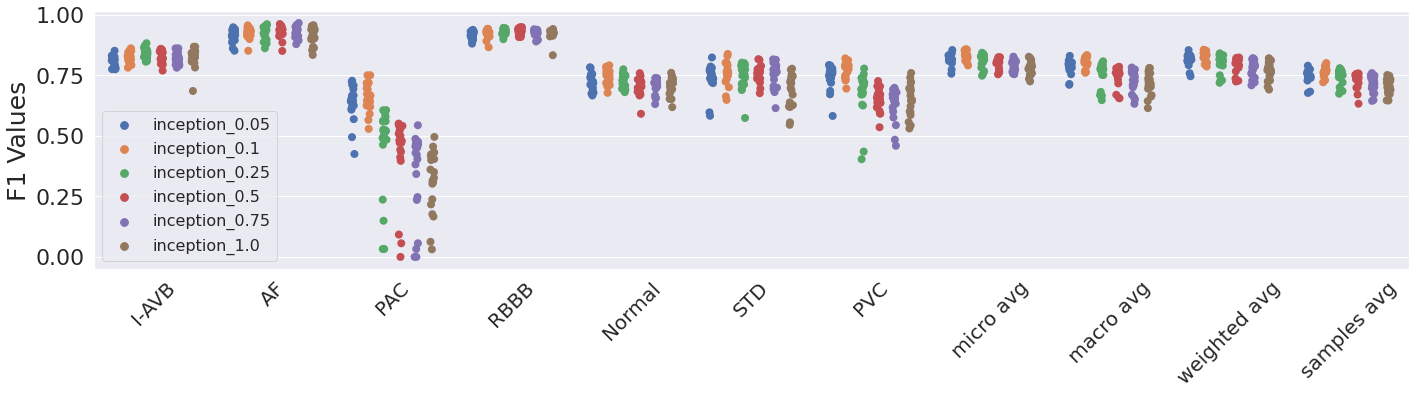

In [312]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

# minirocket cpsc dataset

In [282]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/minirocket_CPSC2018_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "minirocket_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


,classifier_name,1st degree av block,atrial fibrillation,premature atrial contraction,right bundle branch block,sinus rhythm,st depression,ventricular ectopics,micro avg,macro avg,weighted avg,samples avg
0,minirocket_0.1,0.785714,0.900433,0.255319,0.892950,0.627907,0.708571,0.679739,0.756677,0.692948,0.746945,0.662737
1,minirocket_0.1,0.790698,0.915966,0.151899,0.897098,0.666667,0.722892,0.628571,0.759701,0.681970,0.742411,0.666181
2,minirocket_0.1,0.791045,0.887892,0.263158,0.913706,0.639535,0.653595,0.624113,0.759474,0.681863,0.739544,0.656720
3,minirocket_0.1,0.793651,0.903766,0.255814,0.912929,0.685714,0.653061,0.675497,0.768995,0.697204,0.753714,0.670500
4,minirocket_0.1,0.780142,0.870690,0.142857,0.912929,0.662983,0.734940,0.617284,0.758828,0.674546,0.737128,0.664241
...,...,...,...,...,...,...,...,...,...,...,...,...
15,minirocket_1.0,0.814286,0.907563,0.410256,0.912821,0.686567,0.705882,0.620690,0.772305,0.722581,0.769154,0.702572
16,minirocket_1.0,0.823529,0.921053,0.059701,0.881081,0.703297,0.680556,0.569343,0.756329,0.662651,0.726064,0.643550
17,minirocket_1.0,0.842857,0.877049,0.336283,0.888298,0.704545,0.710843,0.618182,0.759420,0.711151,0.756346,0.688840
18,minirocket_1.0,0.846715,0.909871,0.282353,0.919481,0.690058,0.677778,0.579310,0.770958,0.700795,0.755479,0.679282


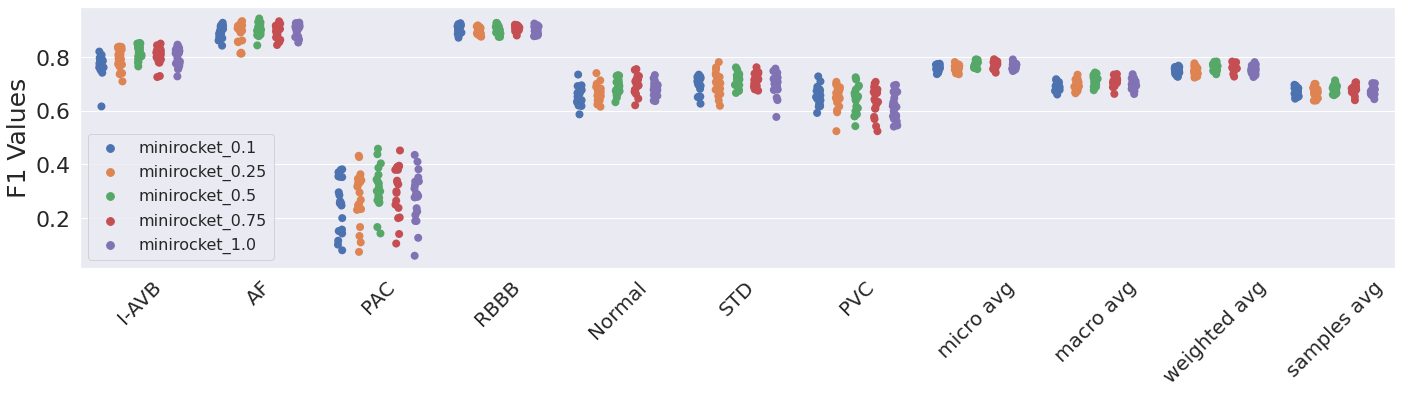

In [283]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

['minirocket_0.1' 'minirocket_0.25' 'minirocket_0.5' 'minirocket_0.75'
 'minirocket_1.0']
minirocket_0.1      0.0
minirocket_0.25     2.0
minirocket_0.5     10.0
minirocket_0.75     7.0
minirocket_1.0      1.0
dtype: float64
minirocket_0.1     3.95
minirocket_1.0     3.35
minirocket_0.25    3.25
minirocket_0.5     2.30
minirocket_0.75    2.15
dtype: float64
('minirocket_0.1', 'minirocket_0.5', 0.0007076263427734375, True)
('minirocket_0.1', 'minirocket_0.75', 0.0007076263427734375, True)
('minirocket_0.5', 'minirocket_1.0', 0.026641845703125, False)
('minirocket_0.75', 'minirocket_1.0', 0.026641845703125, False)
('minirocket_0.25', 'minirocket_0.5', 0.03623390197753906, False)
('minirocket_0.25', 'minirocket_0.75', 0.04844093322753906, False)
('minirocket_0.1', 'minirocket_1.0', 0.10539817810058594, False)
('minirocket_0.1', 'minirocket_0.25', 0.2942523956298828, False)
('minirocket_0.5', 'minirocket_0.75', 0.7841262817382812, False)
('minirocket_0.25', 'minirocket_1.0', 0.956329345703

<module 'matplotlib.pyplot' from '/home/amirsalimi/miniconda3/envs/ecg_augment/lib/python3.10/site-packages/matplotlib/pyplot.py'>

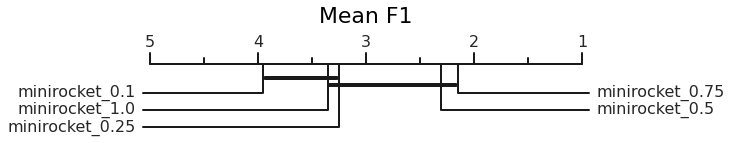

In [284]:
df_median = exp_df.reset_index()[["classifier_name","index",]]
df_median["value"] = list(exp_df[exp_df.columns[0:-4]].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
cdd.draw_cd_diagram(df_perf=df_median, title='Mean F1', labels=False,alpha=0.05)

# inception + chapman 

In [285]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/inception_ChapmanShaoxing_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "inception_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


,classifier_name,atrial fibrillation,left ventricular high voltage,nonspecific st t abnormality,sinus bradycardia,sinus rhythm,sinus tachycardia,supraventricular tachycardia,t wave abnormal,micro avg,macro avg,weighted avg,samples avg
0,inception_0.1,0.858612,0.497738,0.542222,0.989583,0.950904,0.925170,0.797101,0.614925,0.827711,0.772032,0.824259,0.832124
1,inception_0.1,0.873626,0.548523,0.451613,0.992208,0.972705,0.925081,0.782609,0.590799,0.829233,0.767146,0.824326,0.829743
2,inception_0.1,0.876791,0.504587,0.540816,0.988327,0.950649,0.921502,0.833333,0.601351,0.836377,0.777170,0.826125,0.822480
3,inception_0.1,0.878613,0.514563,0.595556,0.987047,0.954082,0.932886,0.868217,0.666667,0.848373,0.799704,0.842816,0.836705
4,inception_0.1,0.879177,0.513619,0.502564,0.990874,0.956522,0.925170,0.838710,0.589595,0.827362,0.774529,0.825123,0.827267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,inception_1.0,0.876081,0.445596,0.561798,0.955000,0.845361,0.898361,0.829268,0.718346,0.821757,0.766226,0.810597,0.809761
16,inception_1.0,0.934097,0.440529,0.453988,0.970475,0.865979,0.894366,0.762712,0.647727,0.813534,0.746234,0.804283,0.799344
17,inception_1.0,0.933333,0.492891,0.460606,0.966667,0.909561,0.933798,0.850000,0.668539,0.835911,0.776924,0.825535,0.825042
18,inception_1.0,0.926554,0.408377,0.549708,0.980494,0.902743,0.936877,0.793893,0.658065,0.839422,0.769589,0.822647,0.830455


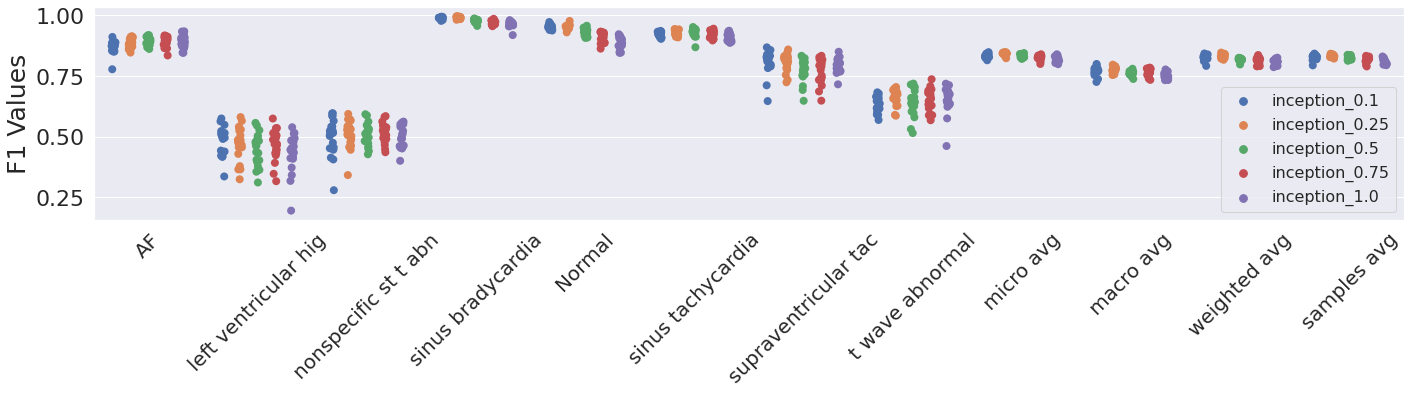

In [286]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

# minirocket chapman

In [287]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/minirocket_ChapmanShaoxing_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "minirocket_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


,classifier_name,atrial fibrillation,left ventricular high voltage,nonspecific st t abnormality,sinus bradycardia,sinus rhythm,sinus tachycardia,supraventricular tachycardia,t wave abnormal,micro avg,macro avg,weighted avg,samples avg
0,minirocket_0.1,0.776280,0.482759,0.432161,0.979434,0.939086,0.869565,0.793388,0.655072,0.802651,0.740968,0.799051,0.801832
1,minirocket_0.1,0.817143,0.536585,0.558824,0.987080,0.942408,0.905263,0.660194,0.645570,0.821805,0.756633,0.817729,0.798810
2,minirocket_0.1,0.790960,0.526786,0.450867,0.976982,0.938144,0.887372,0.737705,0.684783,0.815828,0.749200,0.808944,0.805366
3,minirocket_0.1,0.768392,0.489451,0.522167,0.978121,0.944882,0.898361,0.793651,0.629834,0.807107,0.753107,0.805382,0.807520
4,minirocket_0.1,0.840336,0.572614,0.524017,0.987147,0.923469,0.902597,0.678571,0.630728,0.816356,0.757435,0.817372,0.809919
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,minirocket_1.0,0.833837,0.592857,0.548571,0.980892,0.942105,0.906574,0.703704,0.660969,0.828455,0.771189,0.826660,0.803871
16,minirocket_1.0,0.838889,0.564885,0.529412,0.987080,0.941772,0.910891,0.666667,0.649860,0.826676,0.761182,0.822373,0.819616
17,minirocket_1.0,0.844037,0.538462,0.569948,0.983312,0.945170,0.934211,0.713043,0.664653,0.837879,0.774104,0.829470,0.823363
18,minirocket_1.0,0.857143,0.645390,0.519231,0.984615,0.948718,0.895899,0.666667,0.672566,0.833154,0.773779,0.833127,0.824379


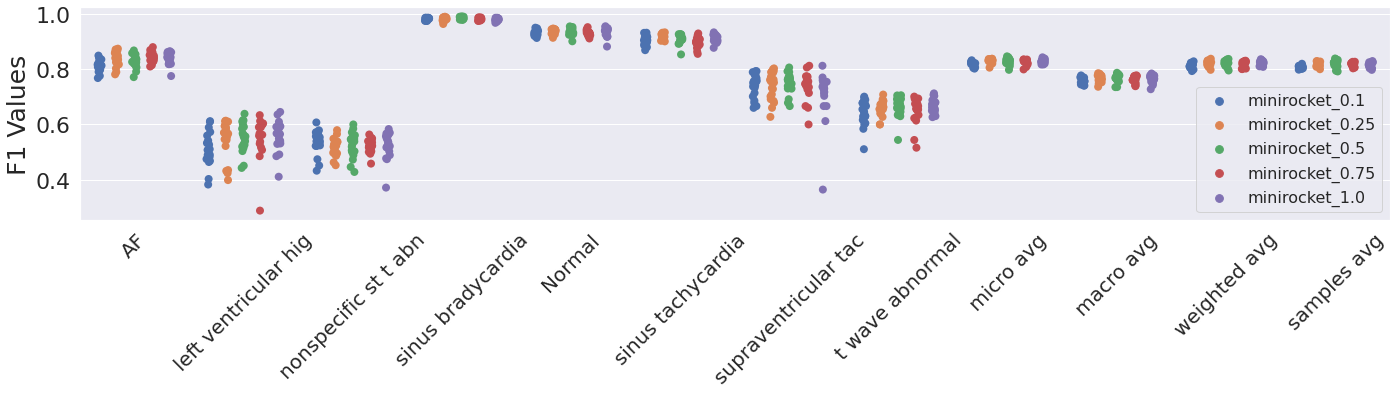

In [290]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

['minirocket_0.1' 'minirocket_0.25' 'minirocket_0.5' 'minirocket_0.75'
 'minirocket_1.0']
minirocket_0.1     0.0
minirocket_0.25    4.0
minirocket_0.5     5.0
minirocket_0.75    3.0
minirocket_1.0     8.0
dtype: float64
minirocket_0.1     3.90
minirocket_0.25    3.00
minirocket_0.75    3.00
minirocket_0.5     2.55
minirocket_1.0     2.55
dtype: float64
('minirocket_0.1', 'minirocket_0.5', 0.009435653686523438, False)
('minirocket_0.1', 'minirocket_1.0', 0.03276824951171875, False)
('minirocket_0.1', 'minirocket_0.25', 0.082550048828125, False)
('minirocket_0.1', 'minirocket_0.75', 0.10539817810058594, False)
('minirocket_0.5', 'minirocket_0.75', 0.34881019592285156, False)
('minirocket_0.25', 'minirocket_0.5', 0.5458755493164062, False)
('minirocket_0.5', 'minirocket_1.0', 0.5458755493164062, False)
('minirocket_0.25', 'minirocket_0.75', 0.6476554870605469, False)
('minirocket_0.75', 'minirocket_1.0', 0.6476554870605469, False)
('minirocket_0.25', 'minirocket_1.0', 0.9272785186767578, 

<module 'matplotlib.pyplot' from '/home/amirsalimi/miniconda3/envs/ecg_augment/lib/python3.10/site-packages/matplotlib/pyplot.py'>

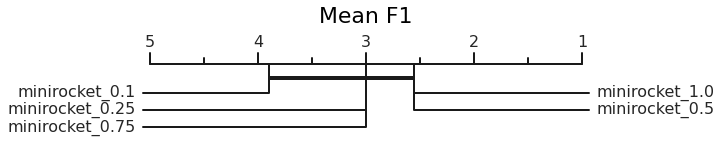

In [291]:
df_median = exp_df.reset_index()[["classifier_name","index",]]
df_median["value"] = list(exp_df[exp_df.columns[0:-4]].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
cdd.draw_cd_diagram(df_perf=df_median, title='Mean F1', labels=False,alpha=0.05)

# inception ptbxl

In [292]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/inception_PTBXL_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "inception_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


,classifier_name,abnormal QRS,atrial fibrillation,incomplete right bundle branch block,left anterior fascicular block,left axis deviation,left ventricular hypertrophy,myocardial infarction,myocardial ischemia,sinus rhythm,t wave abnormal,ventricular ectopics,micro avg,macro avg,weighted avg,samples avg
0,inception_0.1,0.592481,0.793478,0.595918,0.767045,0.764428,0.393333,0.699929,0.636119,0.951313,0.536204,0.772093,0.783550,0.682031,0.777548,0.783625
1,inception_0.1,0.557756,0.702703,0.618644,0.755448,0.801272,0.348993,0.701203,0.593023,0.946260,0.353623,0.784483,0.781766,0.651219,0.760728,0.781792
2,inception_0.1,0.573134,0.755396,0.572864,0.775726,0.775848,0.545455,0.722892,0.577508,0.948488,0.445545,0.778846,0.785374,0.679245,0.777790,0.777788
3,inception_0.1,0.541012,0.796353,0.540230,0.778947,0.685836,0.593548,0.714032,0.637363,0.951939,0.505929,0.717172,0.780404,0.678396,0.771918,0.779075
4,inception_0.1,0.575658,0.821656,0.543590,0.728643,0.776860,0.498845,0.705579,0.669725,0.944916,0.447489,0.728070,0.780744,0.676457,0.774963,0.780178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,inception_1.0,0.652504,0.831325,0.614679,0.779661,0.800000,0.487179,0.755064,0.607143,0.940949,0.509890,0.363636,0.796119,0.667457,0.782977,0.790709
16,inception_1.0,0.498141,0.784173,0.587065,0.806540,0.739088,0.559415,0.763251,0.636591,0.944848,0.515723,0.612245,0.779252,0.677007,0.776347,0.776980
17,inception_1.0,0.588441,0.845921,0.619565,0.664384,0.797524,0.513228,0.745573,0.620879,0.939759,0.391421,0.344828,0.787222,0.642866,0.767079,0.788871
18,inception_1.0,0.607717,0.819484,0.608247,0.628571,0.768000,0.432787,0.751526,0.530744,0.939074,0.499048,0.472727,0.778976,0.641630,0.763664,0.779346


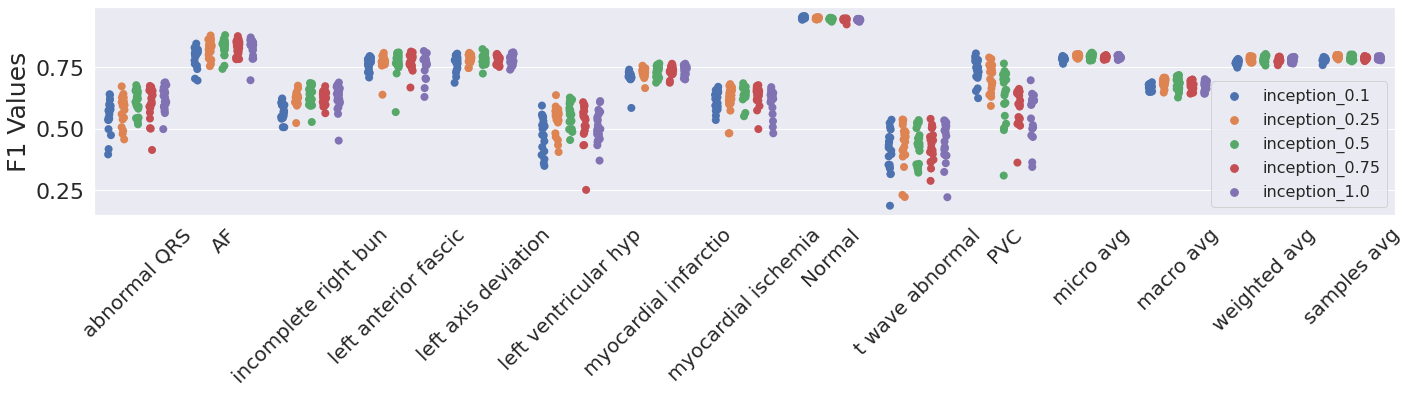

In [293]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

['inception_0.1' 'inception_0.25' 'inception_0.5' 'inception_0.75'
 'inception_1.0']
inception_0.1      0.0
inception_0.25     8.0
inception_0.5     10.0
inception_0.75     0.0
inception_1.0      2.0
dtype: float64
inception_0.1     3.85
inception_1.0     3.45
inception_0.75    3.05
inception_0.5     2.35
inception_0.25    2.30
dtype: float64
('inception_0.1', 'inception_0.25', 0.0003223419189453125, True)
('inception_0.1', 'inception_0.5', 0.009435653686523438, False)
('inception_0.25', 'inception_0.75', 0.026641845703125, False)
('inception_0.25', 'inception_1.0', 0.03276824951171875, False)
('inception_0.1', 'inception_0.75', 0.058258056640625, False)
('inception_0.5', 'inception_1.0', 0.08969497680664062, False)
('inception_0.5', 'inception_0.75', 0.17685317993164062, False)
('inception_0.1', 'inception_1.0', 0.3299827575683594, False)
('inception_0.75', 'inception_1.0', 0.49800872802734375, False)
('inception_0.25', 'inception_0.5', 0.9272785186767578, False)
Index(['inception_0.1

<module 'matplotlib.pyplot' from '/home/amirsalimi/miniconda3/envs/ecg_augment/lib/python3.10/site-packages/matplotlib/pyplot.py'>

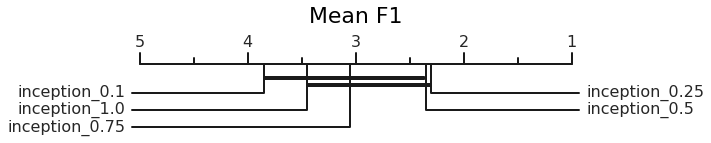

In [294]:
df_median = exp_df.reset_index()[["classifier_name","index",]]
df_median["value"] = list(exp_df[exp_df.columns[0:-4]].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
cdd.draw_cd_diagram(df_perf=df_median, title='Mean F1', labels=False,alpha=0.05)

# minirocket ptbxl

In [295]:
df_median = frame.reset_index()[["classifier_name","index",]]
print(frame.columns[0:-4])
df_median["value"] = list(frame[frame.columns].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
# df_median.head()
experiments = []
for sc in ["0.05","0.1","0.25","0.5","0.75","1.0"]:
    try:
        for i in range(20):
            df = pd.read_csv("models/scaling/csvs/minirocket_PTBXL_sc-n_%s_%s.csv"%(sc,i))
            df = df.loc[df["index"]=="f1-score"]
            df = df.rename(columns={"index":"classifier_name"})
    #         df["dataset_name"] = i
            df["classifier_name"] = "minirocket_%s"%sc
    #         df.index = df["dataset_name"]
        #     df["group"] = i
            df.index = [i]
            experiments.append(df)
    except:
        continue
exp_df = pd.concat(experiments)
exp_df

Index(['1st degree av block', 'atrial fibrillation',
       'premature atrial contraction', 'right bundle branch block',
       'sinus rhythm', 'st depression'],
      dtype='object')


,classifier_name,abnormal QRS,atrial fibrillation,incomplete right bundle branch block,left anterior fascicular block,left axis deviation,left ventricular hypertrophy,myocardial infarction,myocardial ischemia,sinus rhythm,t wave abnormal,ventricular ectopics,micro avg,macro avg,weighted avg,samples avg
0,minirocket_0.1,0.513274,0.738255,0.472222,0.697531,0.745732,0.554667,0.639668,0.593838,0.944969,0.493333,0.660099,0.763413,0.641235,0.752106,0.764473
1,minirocket_0.1,0.504472,0.802508,0.524064,0.715116,0.740402,0.547264,0.671727,0.637975,0.942371,0.472019,0.685714,0.770855,0.658512,0.759152,0.770561
2,minirocket_0.1,0.498350,0.788462,0.371585,0.777202,0.767273,0.612245,0.621622,0.668213,0.936206,0.459227,0.666667,0.762683,0.651550,0.754999,0.762447
3,minirocket_0.1,0.434783,0.749226,0.504202,0.770833,0.750229,0.544000,0.631373,0.660674,0.943575,0.447236,0.647887,0.762862,0.644002,0.748844,0.762911
4,minirocket_0.1,0.519562,0.757962,0.541284,0.806366,0.740173,0.551220,0.625000,0.634361,0.937743,0.459397,0.589286,0.758851,0.651123,0.752088,0.758793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,minirocket_1.0,0.569157,0.800000,0.534653,0.712991,0.766284,0.632353,0.685221,0.627027,0.942478,0.419890,0.651163,0.780185,0.667383,0.769277,0.780822
16,minirocket_1.0,0.546789,0.814815,0.528000,0.729412,0.770413,0.668258,0.692759,0.650943,0.944982,0.456140,0.643564,0.785040,0.676916,0.775637,0.781912
17,minirocket_1.0,0.547899,0.818750,0.490909,0.748503,0.767808,0.556757,0.679139,0.651629,0.943260,0.466830,0.653465,0.777933,0.665905,0.768288,0.775406
18,minirocket_1.0,0.564991,0.805112,0.533898,0.681672,0.787037,0.661692,0.688617,0.642857,0.941729,0.432039,0.660377,0.782005,0.672729,0.773647,0.781534


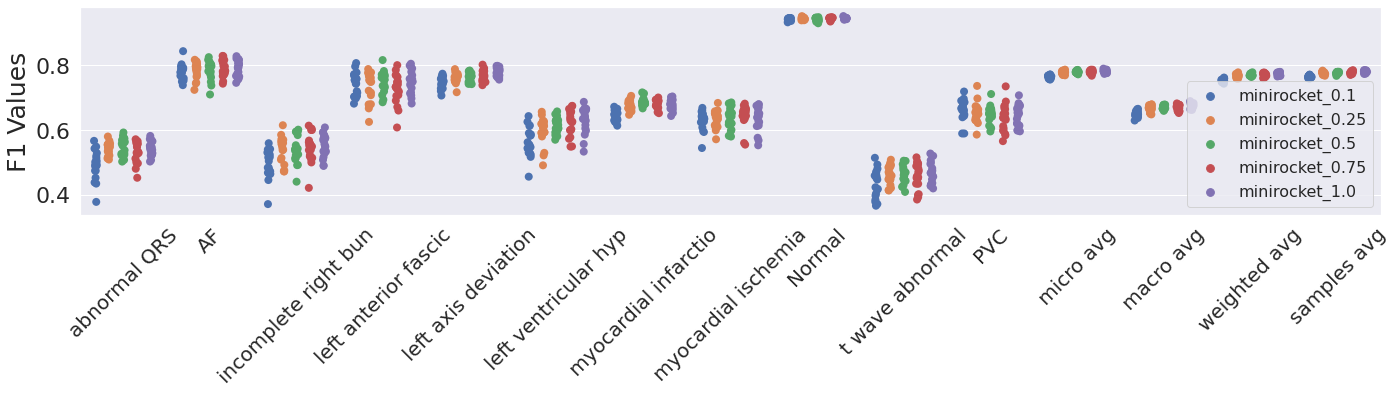

In [296]:
sns.set(rc = {'figure.figsize':(20,6)})
sns.set(font_scale = 2)
data = exp_df.melt(id_vars = "classifier_name")
data["variable"] = [at.label_shortner(x) for x in data["variable"]]

#sns.boxplot(data=data,hue="classifier_name",x="variable",y="value",)
ax = sns.stripplot(data=data,hue="classifier_name",x="variable",y="value",dodge=True,size=8, edgecolor='gray',)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=20,rotation=45)
ax.set_xlabel("", fontsize = 25)
ax.set_ylabel("F1 Values", fontsize = 25)
# ax.set_title("Expriment Results for MiniRocket on CPSC", fontsize = 25)
plt.legend( fontsize = 16)
plt.tight_layout()

['minirocket_0.1' 'minirocket_0.25' 'minirocket_0.5' 'minirocket_0.75'
 'minirocket_1.0']
minirocket_0.1     0.0
minirocket_0.25    4.0
minirocket_0.5     4.0
minirocket_0.75    4.0
minirocket_1.0     8.0
dtype: float64
minirocket_0.1     4.90
minirocket_0.25    3.15
minirocket_0.75    2.55
minirocket_0.5     2.45
minirocket_1.0     1.95
dtype: float64
('minirocket_0.1', 'minirocket_0.5', 1.9073486328125e-06, True)
('minirocket_0.1', 'minirocket_1.0', 1.9073486328125e-06, True)
('minirocket_0.1', 'minirocket_0.75', 5.7220458984375e-06, True)
('minirocket_0.1', 'minirocket_0.25', 9.5367431640625e-06, True)
('minirocket_0.25', 'minirocket_1.0', 0.0072956085205078125, True)
('minirocket_0.75', 'minirocket_1.0', 0.082550048828125, False)
('minirocket_0.25', 'minirocket_0.5', 0.10539817810058594, False)
('minirocket_0.5', 'minirocket_1.0', 0.1893482208251953, False)
('minirocket_0.25', 'minirocket_0.75', 0.49800872802734375, False)
('minirocket_0.5', 'minirocket_0.75', 0.5958194732666016, F

<module 'matplotlib.pyplot' from '/home/amirsalimi/miniconda3/envs/ecg_augment/lib/python3.10/site-packages/matplotlib/pyplot.py'>

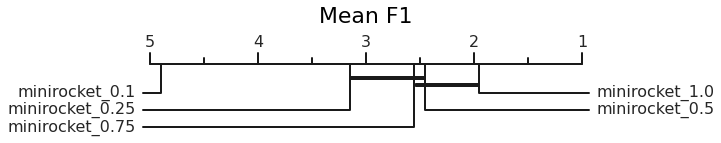

In [297]:
df_median = exp_df.reset_index()[["classifier_name","index",]]
df_median["value"] = list(exp_df[exp_df.columns[0:-4]].mean(axis=1).values)
df_median.columns = ["classifier_name","dataset_name","accuracy"]
cdd.draw_cd_diagram(df_perf=df_median, title='Mean F1', labels=False,alpha=0.05)

In [ ]:
# minirocket ptbxl